In [46]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
plt.style.use("default")

In [48]:
def yes_no_to_bin(dataset: pd.DataFrame, colnames: list[str]):
    for col in colnames:
        dataset[col] = (dataset[col] == "YES").astype(int)

def n_from_10_to_n(dataset: pd.DataFrame, colnames: list[str]):
    """
    Converts "3 From 10" -> 3 (int)
    """
    for col in colnames:
        dataset[col] =  (dataset[col].str.replace(" From 10", "")).astype(int)

def to_dummies(dataset: pd.DataFrame, colnames: list[str]) -> pd.DataFrame:
    for col in colnames:
        dms = pd.get_dummies(dataset[col], prefix=col).astype(int)
        # dms.drop(columns=f"{col}_Seldom", inplace=True)
        dataset = pd.concat([dataset, dms], axis=1)

    # dataset.drop(columns=colnames, inplace=True)
    return dataset

In [49]:
path = kagglehub.dataset_download("mdsultanulislamovi/mental-disorders-dataset")
print(path)
dataset = pd.read_csv(path + "/mental_disorders_dataset.csv")

yes_no_to_bin(dataset, [
    "Mood Swing",
    "Suicidal thoughts",
    "Anorxia",
    "Authority Respect",
    "Try-Explanation",
    "Aggressive Response",
    "Ignore & Move-On",
    "Nervous Break-down",
    "Admit Mistakes",
    "Overthinking",
])

n_from_10_to_n(dataset, [
    "Sexual Activity",
    "Concentration",
    "Optimisim",
])

dataset = to_dummies(dataset, [
    "Sadness",
    "Euphoric",
    "Exhausted",
    "Sleep dissorder",
])

dataset_to_save = dataset.drop(columns=[
    "Sadness",
    "Euphoric",
    "Exhausted",
    "Sleep dissorder",
])
dataset_to_save.to_csv(path + "/mental_disorders_dataset_encoded.csv", index=False)

X = dataset_to_save.drop(columns=["Expert Diagnose", "Patient Number"])

dataset.info()

/home/dom/.cache/kagglehub/datasets/mdsultanulislamovi/mental-disorders-dataset/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Patient Number              120 non-null    object
 1   Sadness                     120 non-null    object
 2   Euphoric                    120 non-null    object
 3   Exhausted                   120 non-null    object
 4   Sleep dissorder             120 non-null    object
 5   Mood Swing                  120 non-null    int64 
 6   Suicidal thoughts           120 non-null    int64 
 7   Anorxia                     120 non-null    int64 
 8   Authority Respect           120 non-null    int64 
 9   Try-Explanation             120 non-null    int64 
 10  Aggressive Response         120 non-null    int64 
 11  Ignore & Move-On            120 non-null    int64 
 12  Nervous Break-d

In [50]:
dataset.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,...,Euphoric_Sometimes,Euphoric_Usually,Exhausted_Most-Often,Exhausted_Seldom,Exhausted_Sometimes,Exhausted_Usually,Sleep dissorder_Most-Often,Sleep dissorder_Seldom,Sleep dissorder_Sometimes,Sleep dissorder_Usually
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,Patiant-02,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,Patiant-04,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


<Axes: xlabel='Expert Diagnose'>

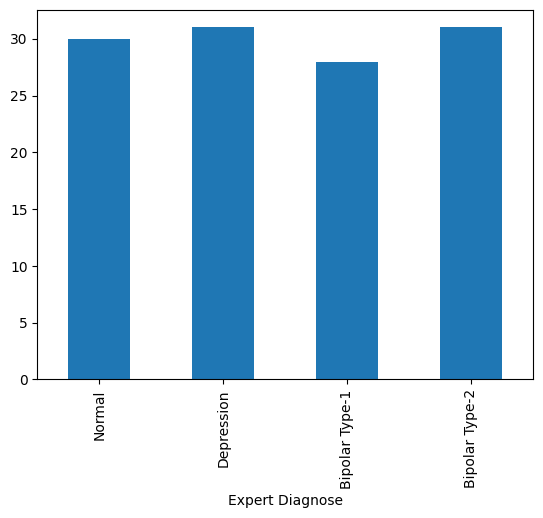

In [51]:
# plt.hist(dataset["Expert Diagnose"].va)
order = ["Normal", "Depression", "Bipolar Type-1", "Bipolar Type-2"]
dataset["Expert Diagnose"].value_counts().loc[order].plot.bar()

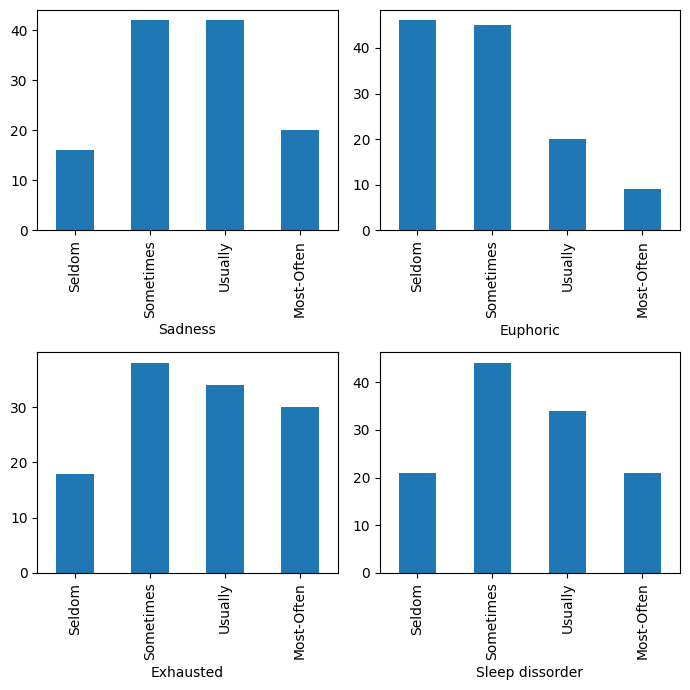

In [68]:
_, axs = plt.subplots(2, 2, figsize=(7, 7))
axs = axs.flatten()

order = ["Seldom", "Sometimes", "Usually", "Most-Often"]

dataset["Sadness"].value_counts().loc[order].plot.bar(ax=axs[0])
dataset["Euphoric"].value_counts().loc[order].plot.bar(ax=axs[1])
dataset["Exhausted"].value_counts().loc[order].plot.bar(ax=axs[2])
dataset["Sleep dissorder"].value_counts().loc[order].plot.bar(ax=axs[3])

plt.tight_layout()
plt.show()

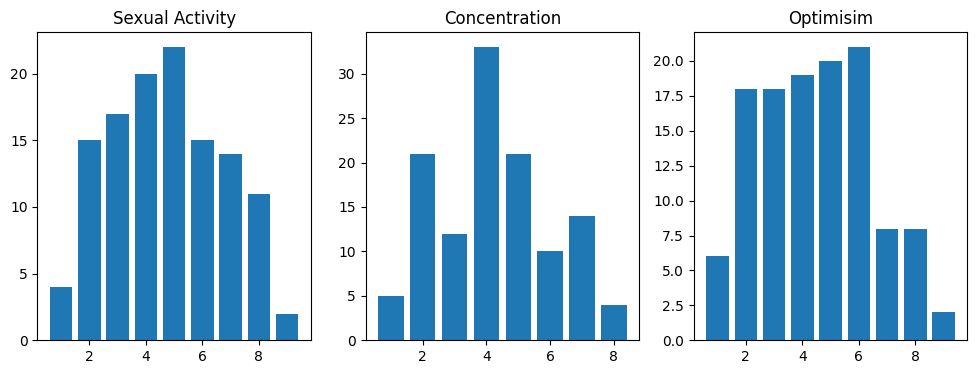

In [120]:
import numpy as np

_, axs = plt.subplots(1, 3, figsize=(12, 4))
axs = axs.flatten()

# "Sexual Activity",
# "Concentration",
# "Optimisim",
counts = dataset["Sexual Activity"].value_counts()
axs[0].bar(counts.index, counts.values)
axs[0].set_title("Sexual Activity")

counts = dataset["Concentration"].value_counts()
axs[1].bar(counts.index, counts.values)
axs[1].set_title("Concentration")

counts = dataset["Optimisim"].value_counts()
axs[2].bar(counts.index, counts.values)
axs[2].set_title("Optimisim")

plt.show()

In [56]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

/home/dom/GitRepos/ML-project/.venv/lib64/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Mood Swing,1.593302
1,Suicidal thoughts,1.289468
2,Anorxia,1.339428
3,Authority Respect,1.511874
4,Try-Explanation,1.245248
5,Aggressive Response,1.531859
6,Ignore & Move-On,1.479008
7,Nervous Break-down,1.332131
8,Admit Mistakes,1.196123
9,Overthinking,1.238039


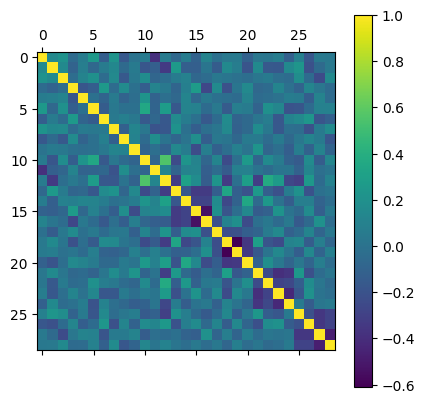

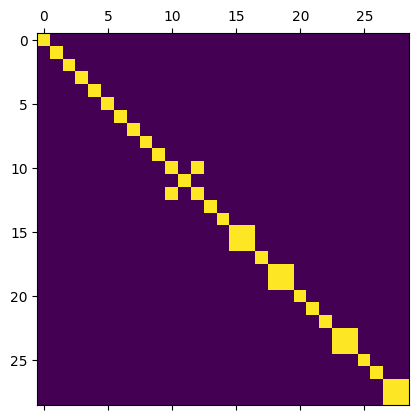

In [57]:
plt.matshow(X.corr())
plt.colorbar()

plt.matshow(X.corr().abs() >= 0.4)
plt.show()